# Setting

Run: ./eval_logits.py

We evaluate on wikitext text dataset, text 2179 sentences, with 418776 tokens
Saturate event: the max logits index doesn't change for deep layers and the same as last prediction
For each token we compute the saturate event happened on which layer





# GPT2 result

average Saturate Event **76741/418776**, Percentage:**0.18325197606497368**
Saturate event count for each layer[ 27840.   1350.   2103.   3551.   5116.   5654.  4797.  8554.   9080. 8879.   5894. 335958.]

# Aligned GPT2 result

Average Saturate Event 199820/418776, Percentage:0.47715376217980193
Saturate event count for each layer[ 44636.  21181.  11975.  11000.   9946.  16599.  19712.  13938.  13235. 16897.  20701. 218956.]

# Multiexit GPT2 Result
steps 22000
Average Saturate Event 304102/418776, Percentage:0.726169628772311
Saturate event count for each layer[114124.  21897.  13392.   6810.   6589.   4329.   4434.   4398.  49557.
  37410.  44959. 110877.]

In [1]:
cos_standard_gpt2 = [0.0512, 0.0582, 0.0749, 0.0898, 0.0987, 0.1082, 0.1224, 0.1345, 0.1497, 0.1697, 0.2724, 1.0]

cos_aligned_gpt2 = [0.016, 0.0191, 0.0222, 0.0293, 0.0378, 0.0505, 0.0598, 0.0684, 0.085, 0.1347, 0.4838, 1.0]

saturate_standard_gpt2 = [27820, 1341, 2054, 3466, 4753, 5409, 4769, 8541, 9075, 8870, 5882, 177481]
saturate_aligned_gpt2 = [43718, 21160, 11930, 10896, 9896, 16166, 11961, 13084, 13182, 16492, 20369, 70607]

In [2]:
def early_saturate_ratio(saturate_numbers):
    print(1 - saturate_numbers[-1] / sum(saturate_numbers))

early_saturate_ratio(saturate_standard_gpt2)
early_saturate_ratio(saturate_aligned_gpt2)

0.3159627073047587
0.7278704699357514


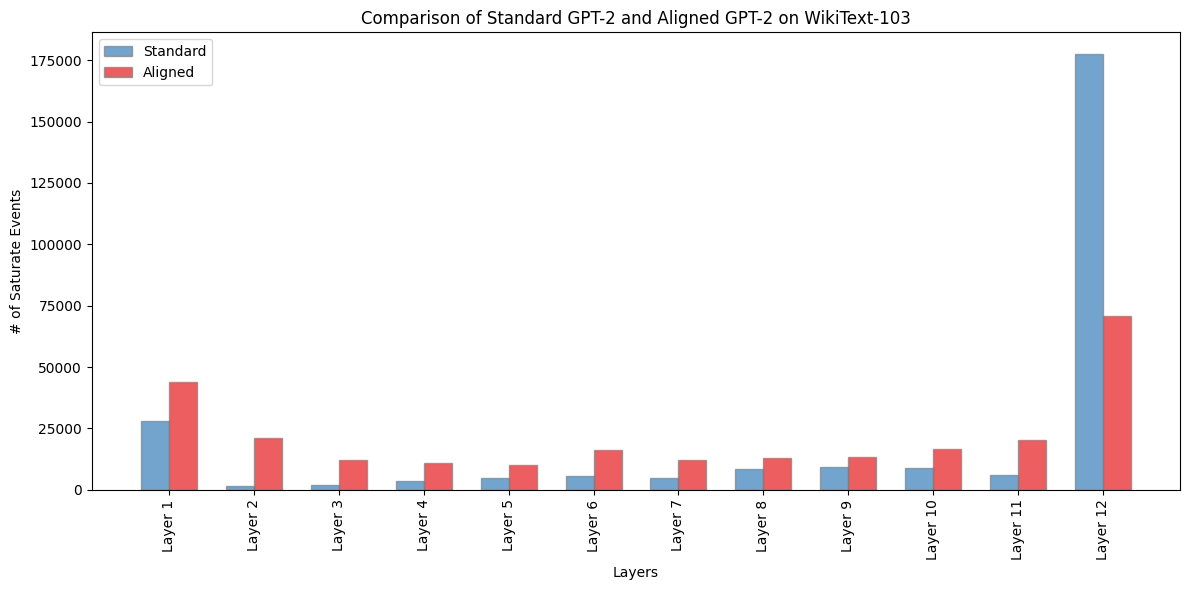

In [3]:
import matplotlib.pyplot as plt
import numpy as np

palette = {
    'orange': '#FF7F00',
    'green': '#4DAF4A',
    'blue': '#377EB8',
    'red': '#E41A1C',
    'brown': '#452600',
    'yellow': '#FFD92F',
}

# Labels for the x-axis
labels = [f'Layer {i+1}' for i in range(len(saturate_standard_gpt2))]

# Number of bars
n = len(saturate_standard_gpt2)

# Bar width
bar_width = 0.33

# Positions of the bars on the x-axis
r1 = np.arange(n)
r2 = [x + bar_width for x in r1]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart on the left y-axis
ax1.bar(r1, saturate_standard_gpt2, color=palette['blue'], width=bar_width, edgecolor='grey', label='Standard', alpha=0.7)
ax1.bar(r2, saturate_aligned_gpt2, color=palette['red'], width=bar_width, edgecolor='grey', label='Aligned', alpha=0.7)

# Set labels and title
ax1.set_xlabel('Layers')
ax1.set_ylabel('# of Saturate Events')
plt.title('Comparison of Standard GPT-2 and Aligned GPT-2 on WikiText-103')

# Set x-ticks in the middle of two bars
plt.xticks([r + bar_width/2 for r in range(n)], labels, rotation=90)

# Add legends
ax1.legend(loc='upper left')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('gpt2_saturate_events.png', bbox_inches='tight', dpi=300)

Cosine similarity data loaded:
[[0.08307335525751114, 0.09676772356033325, 0.07304760068655014, 0.08912282437086105, 0.10324305295944214, 0.1250350922346115, 0.155582994222641, 0.19474123418331146, 0.25343817472457886, 0.3324216604232788, 0.4287026524543762, 1.0], [0.10952441394329071, 0.13136769831180573, 0.151864156126976, 0.17061932384967804, 0.18732337653636932, 0.20725230872631073, 0.23357492685317993, 0.265765905380249, 0.30602386593818665, 0.35912570357322693, 0.4517959654331207, 1.0], [0.11633956432342529, 0.13648922741413116, 0.1576543152332306, 0.17745202779769897, 0.19308045506477356, 0.2121715545654297, 0.236629918217659, 0.2677293121814728, 0.304025262594223, 0.35373374819755554, 0.44462689757347107, 1.0], [0.10751932114362717, 0.12696820497512817, 0.14683319628238678, 0.16529282927513123, 0.18012242019176483, 0.19866344332695007, 0.2216540277004242, 0.248539000749588, 0.28155601024627686, 0.3317471444606781, 0.4299205243587494, 1.0], [0.11102660745382309, 0.12709407508373

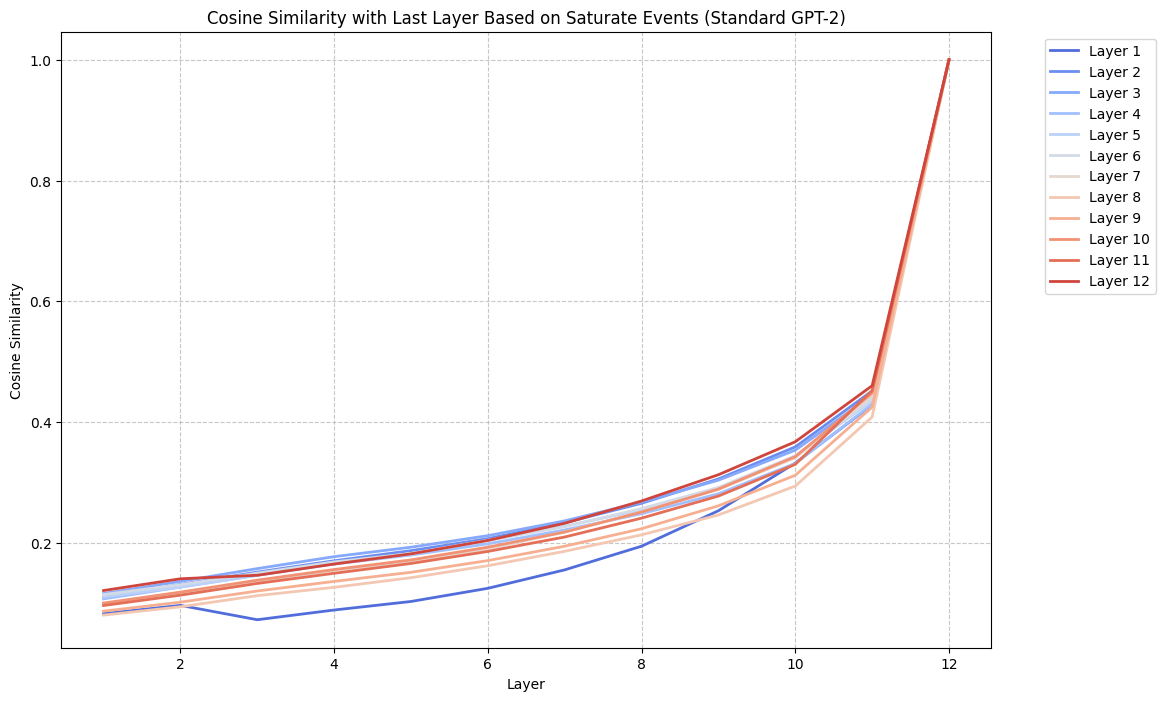

In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Set a heatmap palette
sns.set_palette("coolwarm")

# Read the JSON file
with open('/local/storage1/jiang.2880/Layerwise-Representation-Similarity/standard_gpt2/cos_sim_with_last_based_on_saturate_events/cos_sim_with_last_based_on_saturate_events.json', 'r') as f:
    cos_sim_data = json.load(f)

# Print the data to verify it's loaded correctly
print("Cosine similarity data loaded:")
print(cos_sim_data)

# Create a new figure
plt.figure(figsize=(12, 8))

# Plot each list as a line with a heatmap color
for i, layer_data in enumerate(cos_sim_data, start=1):
    plt.plot(range(1, len(layer_data) + 1), layer_data, label=f'Layer {i}', linewidth=2, color=sns.color_palette("coolwarm", len(cos_sim_data))[i-1])

# Customize the plot
plt.title('Cosine Similarity with Last Layer Based on Saturate Events (Standard GPT-2)')
plt.xlabel('Layer')
plt.ylabel('Cosine Similarity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Save the figure
plt.savefig('standard_gpt2_cos_sim_with_last_layer_based_on_saturate.png', bbox_inches='tight', dpi=300)

Aligned GPT-2 Cosine similarity data loaded:
[[0.12970495223999023, 0.15614058077335358, 0.18586060404777527, 0.2061762511730194, 0.22545546293258667, 0.24842342734336853, 0.2715207040309906, 0.2966725826263428, 0.323444664478302, 0.3545089364051819, 0.40598320960998535, 1.0], [0.13553838431835175, 0.16809393465518951, 0.1962233930826187, 0.2174820899963379, 0.23642084002494812, 0.25960713624954224, 0.28266412019729614, 0.3063737452030182, 0.3329012393951416, 0.3618736267089844, 0.4126429855823517, 1.0], [0.13217435777187347, 0.16399237513542175, 0.1927780658006668, 0.21434932947158813, 0.2331683188676834, 0.2549104690551758, 0.276205450296402, 0.29817673563957214, 0.32273656129837036, 0.34837576746940613, 0.3943409323692322, 1.0], [0.12930473685264587, 0.16017545759677887, 0.18999963998794556, 0.21383023262023926, 0.233523890376091, 0.25682225823402405, 0.27973511815071106, 0.3031144142150879, 0.3292490541934967, 0.3559277355670929, 0.3992886245250702, 1.0], [0.12969987094402313, 0.16

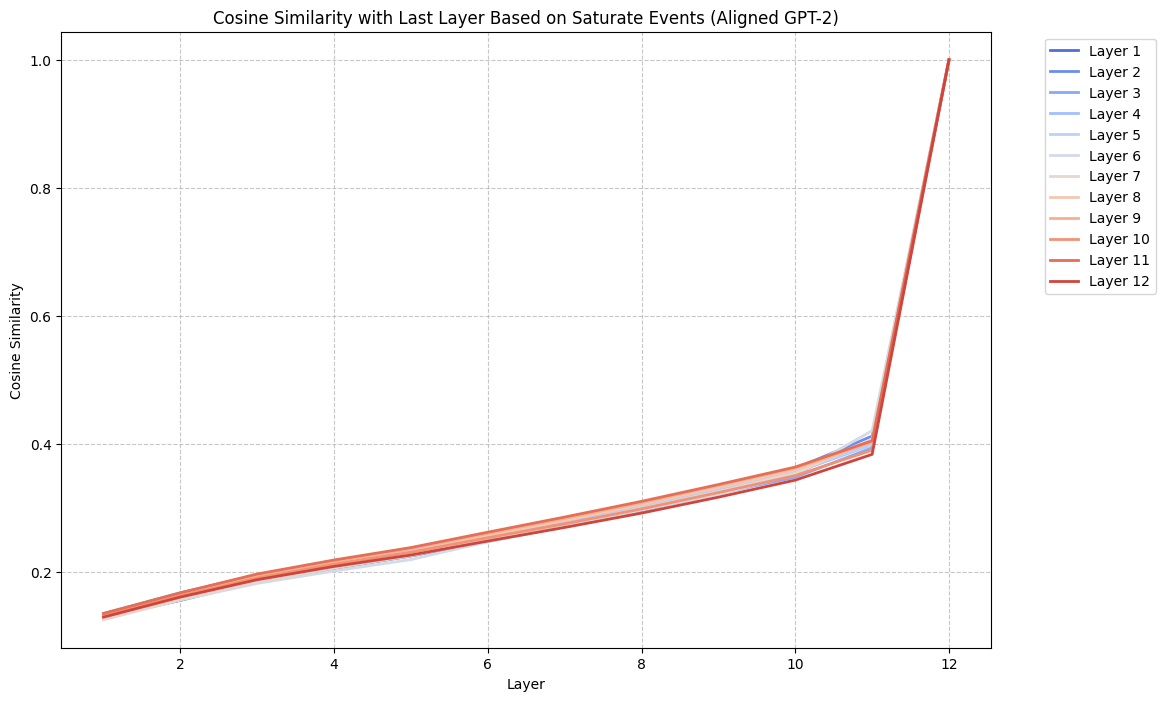

In [5]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Set a heatmap palette
sns.set_palette("coolwarm")

# Read the JSON file for aligned GPT-2
with open('/local/storage1/jiang.2880/Layerwise-Representation-Similarity/aligned_gpt2/cos_sim_with_last_based_on_saturate_events/cos_sim_with_last_based_on_saturate_events.json', 'r') as f:
    aligned_cos_sim_data = json.load(f)

# Print the data to verify it's loaded correctly
print("Aligned GPT-2 Cosine similarity data loaded:")
print(aligned_cos_sim_data)

# Create a new figure
plt.figure(figsize=(12, 8))

# Plot each list as a line with a heatmap color
for i, layer_data in enumerate(aligned_cos_sim_data, start=1):
    plt.plot(range(1, len(layer_data) + 1), layer_data, label=f'Layer {i}', linewidth=2, color=sns.color_palette("coolwarm", len(aligned_cos_sim_data))[i-1])

# Customize the plot
plt.title('Cosine Similarity with Last Layer Based on Saturate Events (Aligned GPT-2)')
plt.xlabel('Layer')
plt.ylabel('Cosine Similarity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Save the figure
plt.savefig('aligned_gpt2_cos_sim_with_last_layer_based_on_saturate.png', bbox_inches='tight', dpi=300)


Standard GPT-2 Cosine similarity data loaded:
[[0.28125470876693726, 0.28937074542045593, 0.2837546467781067, 0.27999401092529297, 0.2780122458934784, 0.2801625728607178, 0.2873430848121643, 0.29497087001800537, 0.30364230275154114, 0.3157605230808258, 0.32106244564056396, -0.05211082473397255], [0.18129362165927887, 0.19507060945034027, 0.20098812878131866, 0.20429572463035583, 0.20810139179229736, 0.2173641175031662, 0.2300124168395996, 0.24508491158485413, 0.25941693782806396, 0.2777774930000305, 0.2943258285522461, -0.04509294033050537], [0.18390555679798126, 0.1946244239807129, 0.20280219614505768, 0.20579741895198822, 0.21035648882389069, 0.22039522230625153, 0.23486657440662384, 0.25228652358055115, 0.26472190022468567, 0.2829707860946655, 0.29641324281692505, -0.04014451056718826], [0.17459331452846527, 0.1877962350845337, 0.1924184262752533, 0.19570867717266083, 0.200918048620224, 0.21412886679172516, 0.2283598780632019, 0.24956940114498138, 0.2617931663990021, 0.2893579900264

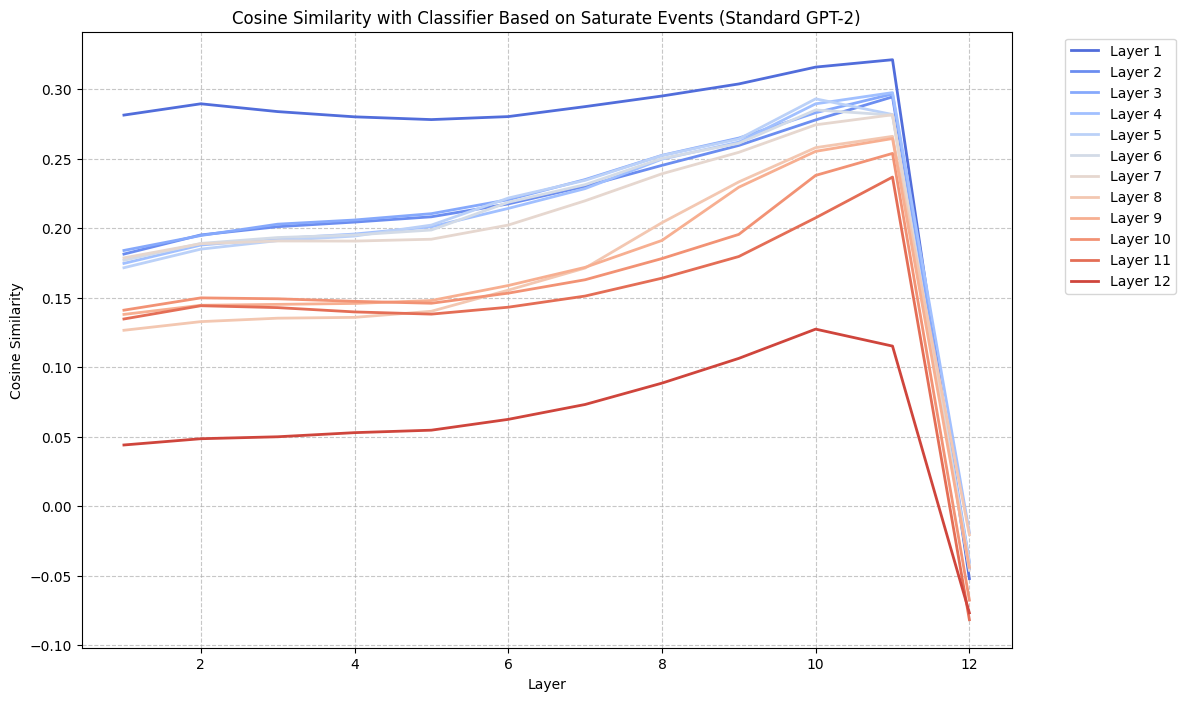

In [6]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Set a heatmap palette
sns.set_palette("coolwarm")

# Read the JSON file for standard GPT-2
with open('/local/storage1/jiang.2880/Layerwise-Representation-Similarity/standard_gpt2/cos_sim_with_classifier_based_on_saturate_layers/cos_sim_with_classifier_based_on_saturate_layers.json', 'r') as f:
    standard_cos_sim_data = json.load(f)

# Print the data to verify it's loaded correctly
print("Standard GPT-2 Cosine similarity data loaded:")
print(standard_cos_sim_data)

# Create a new figure
plt.figure(figsize=(12, 8))

# Plot each list as a line with a heatmap color
for i, layer_data in enumerate(standard_cos_sim_data, start=1):
    plt.plot(range(1, len(layer_data) + 1), layer_data, label=f'Layer {i}', linewidth=2, color=sns.color_palette("coolwarm", len(standard_cos_sim_data))[i-1])

# Customize the plot
plt.title('Cosine Similarity with Classifier Based on Saturate Events (Standard GPT-2)')
plt.xlabel('Layer')
plt.ylabel('Cosine Similarity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Save the figure
plt.savefig('standard_gpt2_cos_sim_with_classifier_based_on_saturate.png', bbox_inches='tight', dpi=300)


Aligned GPT-2 Cosine similarity data loaded:
[[0.06844855099916458, 0.06585963070392609, 0.06955797225236893, 0.06870875507593155, 0.06717707961797714, 0.0640711858868599, 0.05815752223134041, 0.052825942635536194, 0.046913035213947296, 0.03782640025019646, -0.007393714971840382, -0.08728786557912827], [0.06723929941654205, 0.06512962281703949, 0.06832201778888702, 0.06789352744817734, 0.06490367650985718, 0.06111501529812813, 0.055436454713344574, 0.05046425387263298, 0.04442649334669113, 0.03519654646515846, -0.007004681043326855, -0.09317437559366226], [0.057176414877176285, 0.05392172187566757, 0.061488740146160126, 0.06307339668273926, 0.0613507442176342, 0.05840395763516426, 0.05339019373059273, 0.048771560192108154, 0.04307536035776138, 0.03439425677061081, -0.006740013137459755, -0.09232917428016663], [0.05019918829202652, 0.04830973967909813, 0.0529569536447525, 0.058243729174137115, 0.05770302191376686, 0.055801939219236374, 0.050976868718862534, 0.046474434435367584, 0.04105

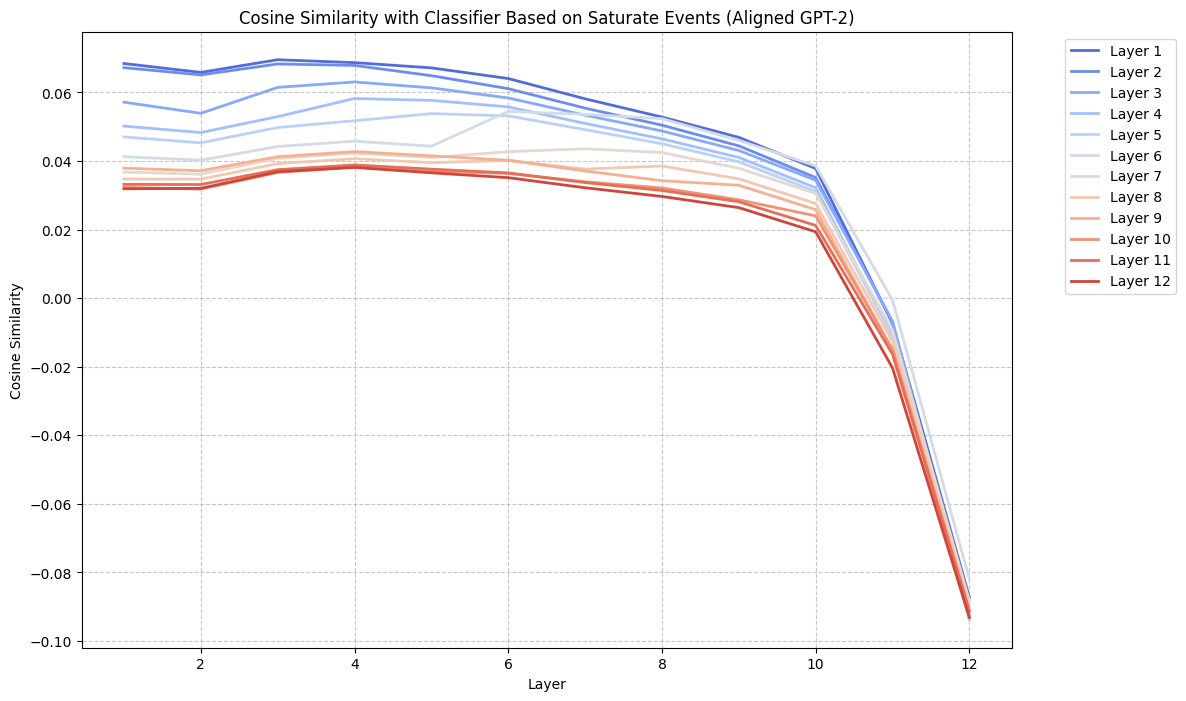

In [9]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Set a heatmap palette
sns.set_palette("coolwarm")

# Read the JSON file for aligned GPT-2
with open('/local/storage1/jiang.2880/Layerwise-Representation-Similarity/aligned_gpt2/cos_sim_with_classifier_based_on_saturate_layers/cos_sim_with_classifier_based_on_saturate_layers.json', 'r') as f:
    aligned_cos_sim_data = json.load(f)

# Print the data to verify it's loaded correctly
print("Aligned GPT-2 Cosine similarity data loaded:")
print(aligned_cos_sim_data)

# Create a new figure
plt.figure(figsize=(12, 8))

# Plot each list as a line with a heatmap color
for i, layer_data in enumerate(aligned_cos_sim_data, start=1):
    plt.plot(range(1, len(layer_data) + 1), layer_data, label=f'Layer {i}', linewidth=2, color=sns.color_palette("coolwarm", len(aligned_cos_sim_data))[i-1])

# Customize the plot
plt.title('Cosine Similarity with Classifier Based on Saturate Events (Aligned GPT-2)')
plt.xlabel('Layer')
plt.ylabel('Cosine Similarity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Save the figure
plt.savefig('aligned_gpt2_cos_sim_with_classifier_based_on_saturate.png', bbox_inches='tight', dpi=300)


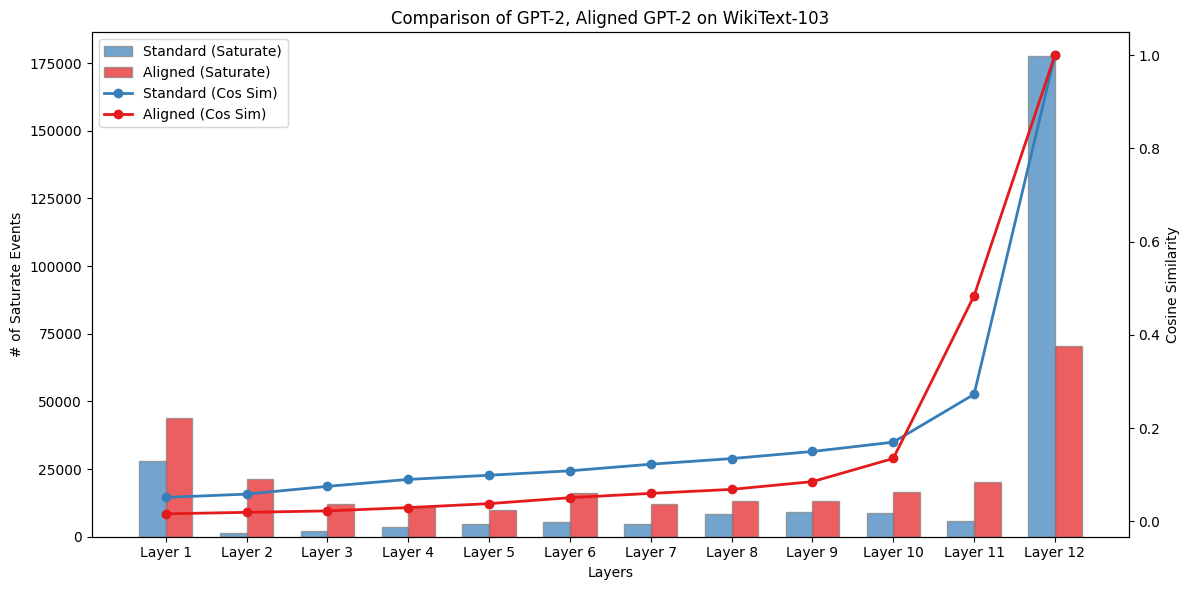

In [7]:
import matplotlib.pyplot as plt
import numpy as np

palette = {
    'orange': '#FF7F00',
    'green': '#4DAF4A',
    'blue': '#377EB8',
    'red': '#E41A1C',
    'brown': '#452600',
    'yellow': '#FFD92F',
}

# Labels for the x-axis
labels = [f'Layer {i+1}' for i in range(len(saturate_standard_gpt2))]

# Number of bars
n = len(saturate_standard_gpt2)

# Bar width
bar_width = 0.33

# Positions of the bars on the x-axis
r1 = np.arange(n)
r2 = [x + bar_width for x in r1]

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot bar chart on the left y-axis
ax1.bar(r1, saturate_standard_gpt2, color=palette['blue'], width=bar_width, edgecolor='grey', label='Standard (Saturate)', alpha=0.7)
ax1.bar(r2, saturate_aligned_gpt2, color=palette['red'], width=bar_width, edgecolor='grey', label='Aligned (Saturate)', alpha=0.7)

# Plot line chart on top of the bar chart
r_middle = [r + bar_width/2 for r in r1]
ax2.plot(r_middle, cos_standard_gpt2, color=palette['blue'], marker='o', linestyle='-', label='Standard (Cos Sim)', linewidth=2, markersize=6)
ax2.plot(r_middle, cos_aligned_gpt2, color=palette['red'], marker='o', linestyle='-', label='Aligned (Cos Sim)', linewidth=2, markersize=6)

# Set labels and title
ax1.set_xlabel('Layers')
ax1.set_ylabel('# of Saturate Events')
ax2.set_ylabel('Cosine Similarity')
plt.title('Comparison of GPT-2, Aligned GPT-2 on WikiText-103')

# Set x-ticks in the middle of two bars
plt.xticks([r + bar_width/2 for r in range(n)], labels, rotation=90)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('saturate_events_and_cos_sim_gpt2.png', bbox_inches='tight', dpi=300)


In [8]:
# we also want to evaluate for specific token, whether the saturate layer is moving shallower for aligned GPT-2

# load alignedgpt2_saturate_event.npy
import numpy as np
import matplotlib.pyplot as plt

gpt2_saturate_event = np.load('gpt2_saturate_event.npy')
alignedgpt2_saturate_event = np.load('alignedgpt2_saturate_event.npy')

offset_layers = np.array(gpt2_saturate_event) - np.array(alignedgpt2_saturate_event)

# collect offset_layers to histogram
unique, counts = np.unique(offset_layers, return_counts=True)

offset = dict(zip(unique, counts))
print(offset)

# plot offset dict
plt.figure(figsize=(12, 6))
plt.bar(offset.keys(), offset.values(), color='#67B1D7', edgecolor='grey')
plt.xlabel('Offset Layers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Offset Layers for Saturate Event of Aligned GPT-2 relative to GPT-2')
# plt.show()

plt.savefig('offset_layers.png', bbox_inches='tight', dpi=300)


ValueError: operands could not be broadcast together with shapes (418776,) (12,) 

{-11: 2917, -10: 676, -9: 1130, -8: 768, -7: 882, -6: 1263, -5: 1625, -4: 2447, -3: 2767, -2: 3351, -1: 3369, 0: 119015, 1: 44458, 2: 37757, 3: 52061, 4: 8455, 5: 8406, 6: 7402, 7: 11891, 8: 11256, 9: 13932, 10: 18573, 11: 64375}


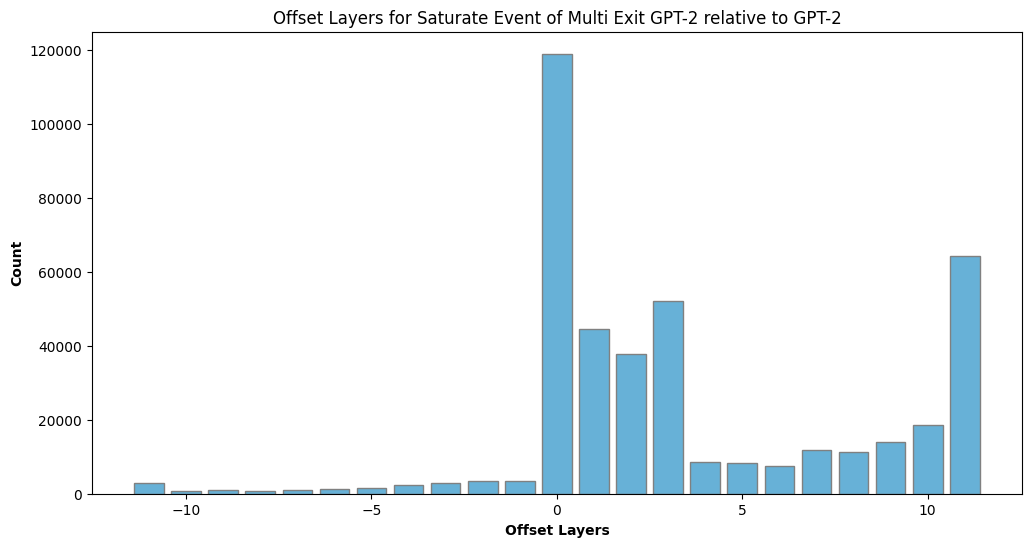

In [ ]:
# we also want to evaluate for specific token, whether the saturate layer is moving shallower for aligned GPT-2

# load alignedgpt2_saturate_event.npy
import numpy as np
import matplotlib.pyplot as plt

gpt2_saturate_event = np.load('gpt2_saturate_event.npy')
multiexit_gpt2_saturate_event = np.load('multiexitgpt2_saturate_event.npy')

offset_layers = np.array(gpt2_saturate_event) - np.array(multiexit_gpt2_saturate_event)

# collect offset_layers to histogram
unique, counts = np.unique(offset_layers, return_counts=True)

offset = dict(zip(unique, counts))
print(offset)

# plot offset dict
plt.figure(figsize=(12, 6))
plt.bar(offset.keys(), offset.values(), color='#67B1D7', edgecolor='grey')
plt.xlabel('Offset Layers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Offset Layers for Saturate Event of Multi Exit GPT-2 relative to GPT-2')
# plt.show()
plt.savefig('offset_layers_multiexit.png', bbox_inches='tight', dpi=300)

{-11: 24149, -10: 12675, -9: 11211, -8: 8992, -7: 8485, -6: 8111, -5: 8875, -4: 8145, -3: 48184, -2: 43599, -1: 56443, 0: 110448, 1: 11576, 2: 12334, 3: 6854, 4: 6668, 5: 6016, 6: 7030, 7: 4194, 8: 3822, 9: 3536, 10: 4124, 11: 3305}


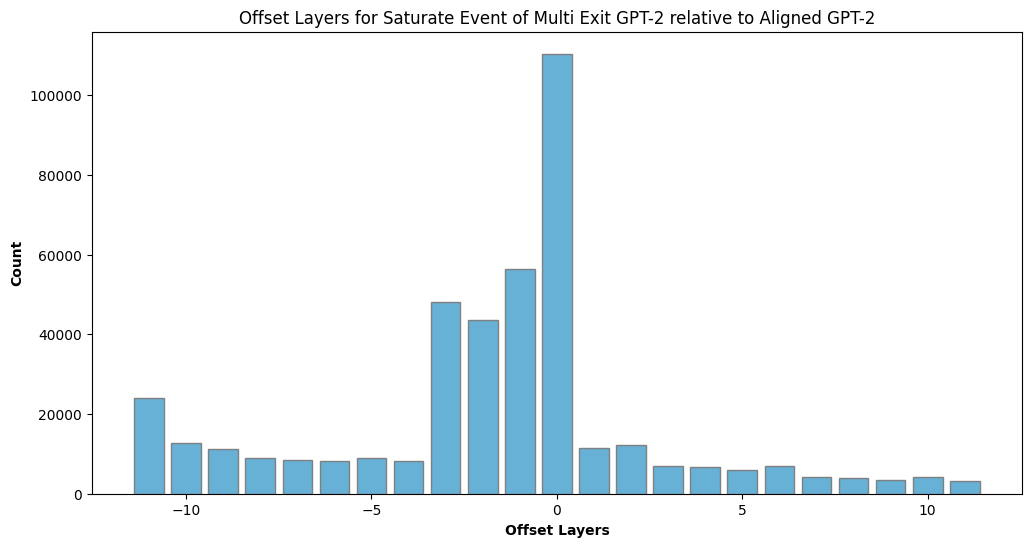

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


alignedgpt2_saturate_event = np.load('alignedgpt2_saturate_event.npy')
multiexit_gpt2_saturate_event = np.load('multiexitgpt2_saturate_event.npy')

offset_layers = np.array(multiexit_gpt2_saturate_event) - np.array(alignedgpt2_saturate_event)

# collect offset_layers to histogram
unique, counts = np.unique(offset_layers, return_counts=True)

offset = dict(zip(unique, counts))
print(offset)

# plot offset dict
plt.figure(figsize=(12, 6))
plt.bar(offset.keys(), offset.values(), color='#67B1D7', edgecolor='grey')
plt.xlabel('Offset Layers', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Offset Layers for Saturate Event of Multi Exit GPT-2 relative to Aligned GPT-2')
plt.show()